<a href="https://colab.research.google.com/github/MichalPietruszevski/NeuralNetworks/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

In [19]:
upload = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [29]:
df = pd.read_csv(io.StringIO(upload['Churn_Modelling.csv'].decode('utf-8')))
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df = df.drop(["RowNumber",'CustomerId','Surname'], axis = 1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [35]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

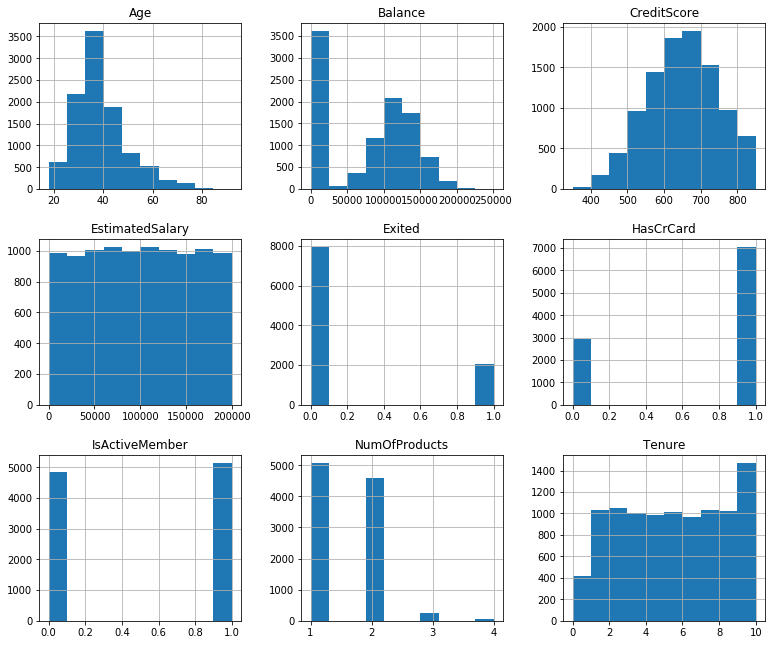

In [39]:
df.hist(figsize=(13,11));

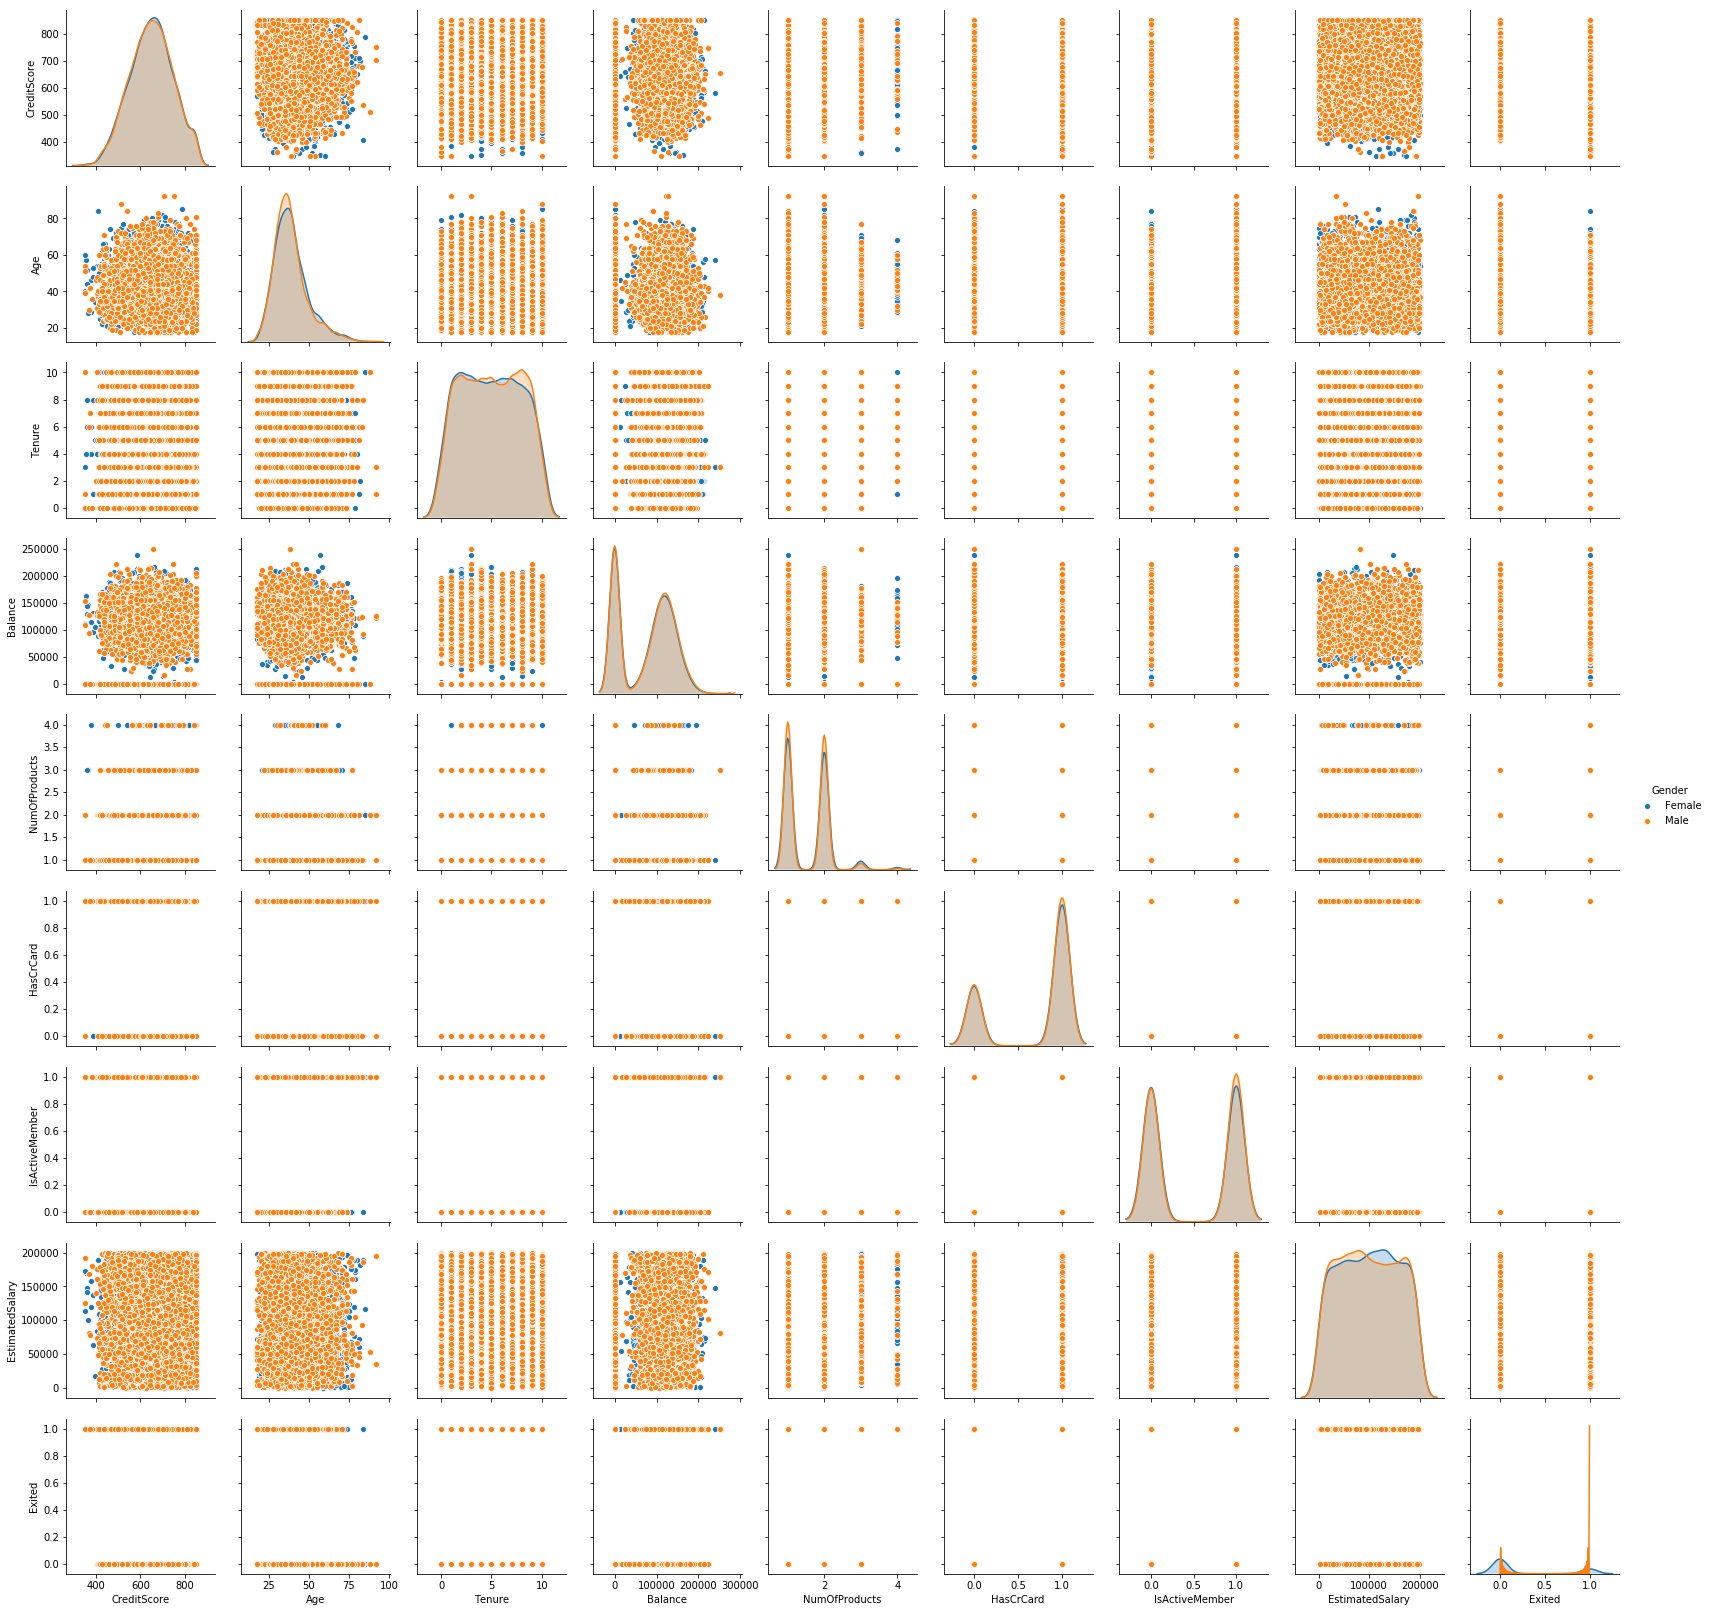

In [42]:
sns.pairplot(df, hue= "Gender");

In [57]:
print(df.Gender.value_counts())
print(df.Exited.value_counts())
print(df.IsActiveMember.value_counts())
print(df.HasCrCard.value_counts())
print(df.NumOfProducts.value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64
0    7963
1    2037
Name: Exited, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64
1    7055
0    2945
Name: HasCrCard, dtype: int64
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


In [63]:
df['Female'] = df.Gender == "Female"
df['Male'] = df.Gender == "Male"
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,True,False
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,False,True
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,False,True
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,True,False
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,False,True
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,False,True
